### import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read the dataset

In [2]:
data = pd.read_csv(r"F:\ICTAK\data sets\StudentsPerformance.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [3]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1. Find out how many males and females participated in the test

In [4]:
# total males and females
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [5]:
# completed status
completed = data[data['test preparation course'] == 'completed']
completed['gender'].value_counts()

female    184
male      174
Name: gender, dtype: int64

In [6]:
# none count
(data['gender'].value_counts()) - (completed['gender'].value_counts())

female    334
male      308
Name: gender, dtype: int64

### 2. What do you think about the students parental level of education.

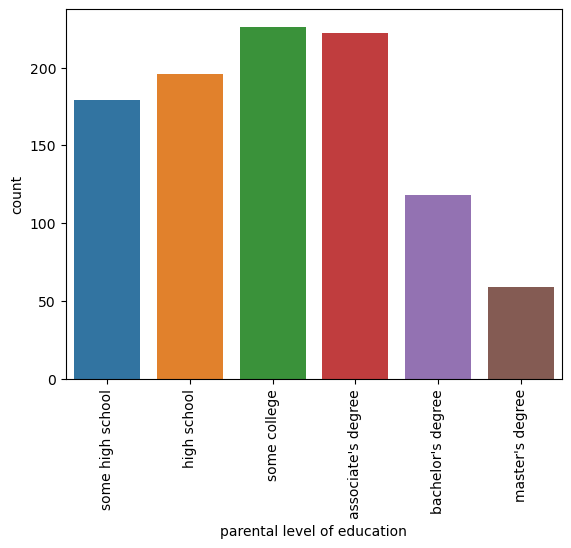

In [7]:
sns.countplot(x=data['parental level of education'], data=data)
plt.xticks(rotation=90)
plt.show()

#### Most common education of parents is some college and associate's degree. The master's degree is the fewest

In [8]:
labels = data['parental level of education'].value_counts().index
values = data['parental level of education'].value_counts().values

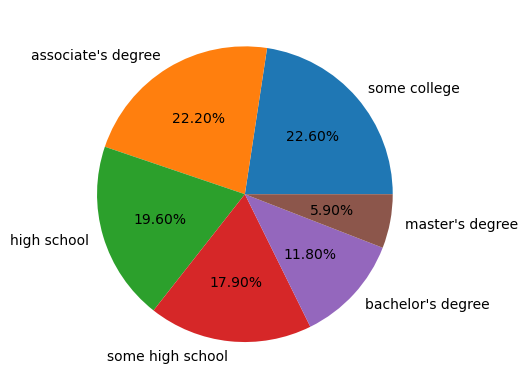

In [9]:
# distribution of parental level of education
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.show()

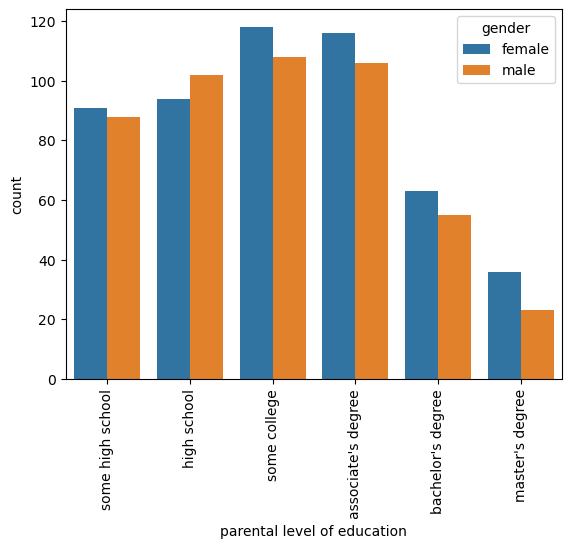

In [10]:
# relation between parent education and gender
sns.countplot(x=data['parental level of education'], hue=data['gender'], data=data)
plt.xticks(rotation=90)
plt.show()

#### Parent education level of females are more than males, except high school education level

### 3. Who scores the most on average for math, reading and writing based on
####                                    ● Gender
####                                    ● Test preparation course

In [11]:
# based on gender
data.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [12]:
# based on test preparation course
data.groupby('test preparation course')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### 4. What do you think about the scoring variation for math, reading and writing based on
####          ● Gender
####          ● Test preparation course

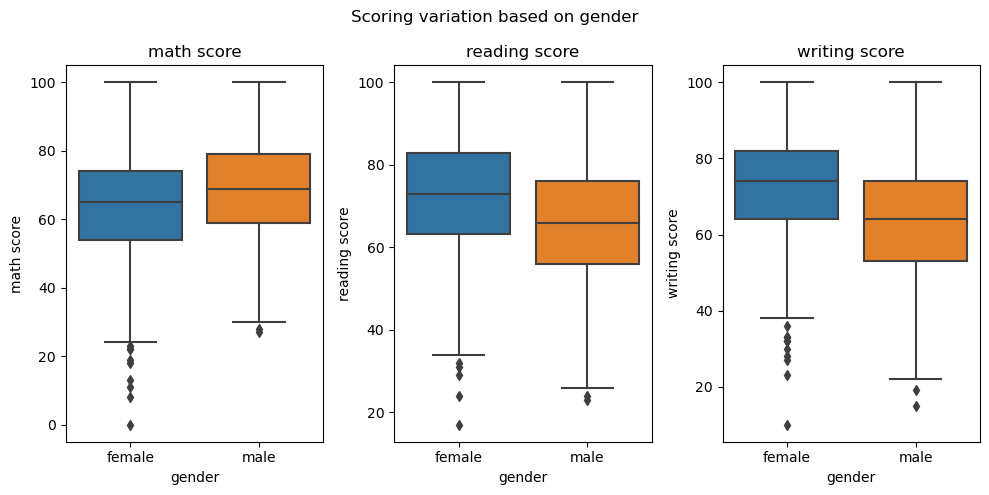

In [13]:
# based on gender

plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.title('math score')
sns.boxplot(x='gender', y='math score', data=data)

plt.subplot(1,3,2)
plt.title('reading score')
sns.boxplot(x='gender', y='reading score', data=data)

plt.subplot(1,3,3)
plt.title('writing score')
sns.boxplot(x='gender', y='writing score', data=data)

plt.suptitle('Scoring variation based on gender')
plt.tight_layout()

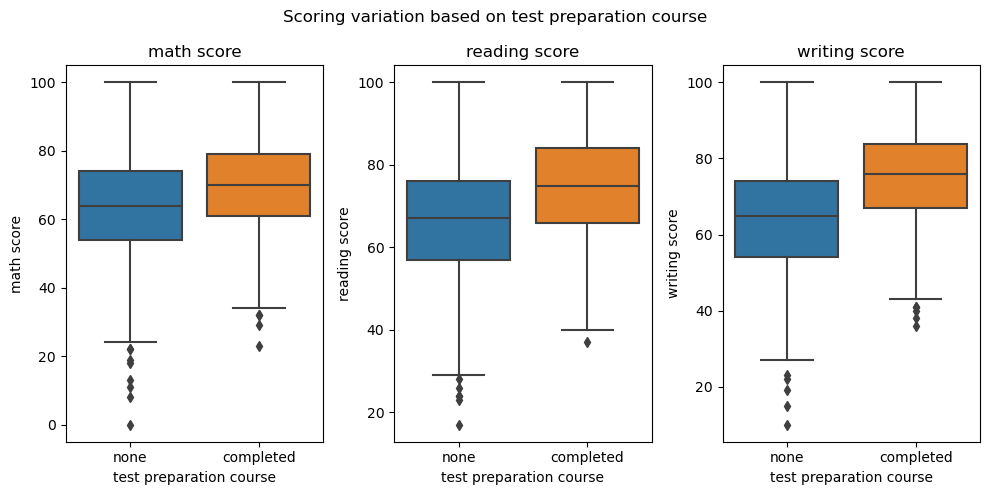

In [14]:
# based on test preparation

plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.title('math score')
sns.boxplot(x='test preparation course', y='math score', data=data)

plt.subplot(1,3,2)
plt.title('reading score')
sns.boxplot(x='test preparation course', y='reading score', data=data)

plt.subplot(1,3,3)
plt.title('writing score')
sns.boxplot(x='test preparation course', y='writing score', data=data)

plt.suptitle('Scoring variation based on test preparation course')
plt.tight_layout()

### 5. The management needs your help to give bonus points to the top 25% of students based on their math                       score, so how will you help the management to achieve this.

In [15]:
# Sort the dataset based on math score
sorted_data = data.sort_values(by='math score', ascending=False)
sorted_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
995,male,group E,some college,standard,completed,99,87,81
513,female,group E,bachelor's degree,standard,completed,99,100,100
514,female,group E,high school,standard,none,99,93,90


In [16]:
# total entries is 1000, then 25% of 1000 is
n = (1000 // 100) * 25
n

250

In [17]:
# top 25% of students based on math score
top_25 = sorted_data.head(n)
top_25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
